In [1]:
import pandas as pd
import numpy as np
white = pd.read_csv("winequality_white_cleaned.csv")

white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6


In [2]:
dupes = white.duplicated() #determine if there are any duplicate rows
sum(dupes)

943

In [3]:
white.drop_duplicates(inplace=True)

In [4]:
white.shape

(3955, 10)

In [5]:
white.columns
white.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.0

array([[<AxesSubplot:title={'center':'fixed acidity'}>]], dtype=object)

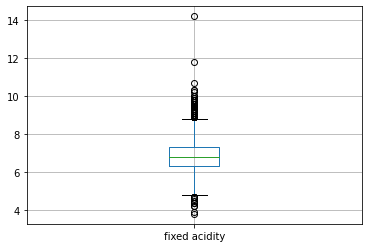

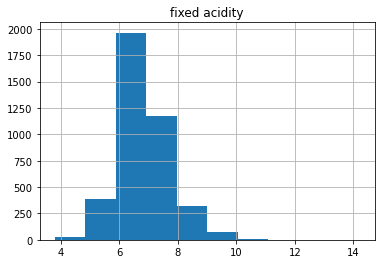

In [6]:
white.boxplot('fixed acidity')
white.hist('fixed acidity')

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

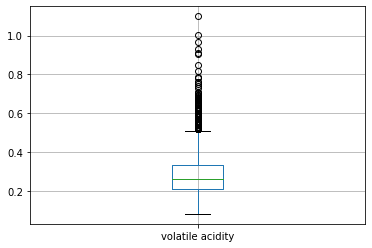

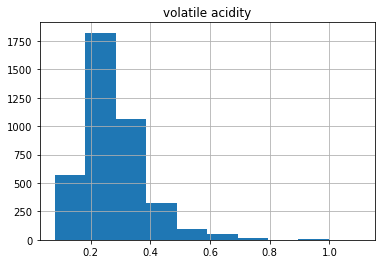

In [7]:
white.boxplot('volatile acidity')
white.hist('volatile acidity')

array([[<AxesSubplot:title={'center':'citric acid'}>]], dtype=object)

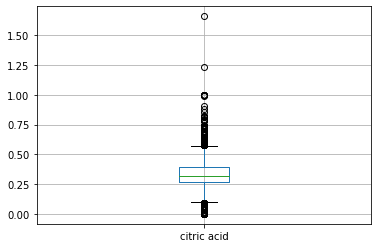

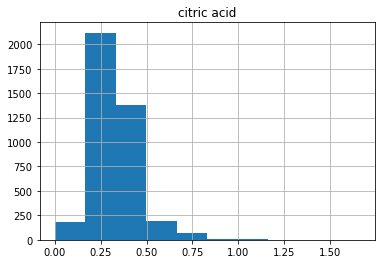

In [8]:
white.boxplot('citric acid')
white.hist('citric acid')

array([[<AxesSubplot:title={'center':'residual sugar'}>]], dtype=object)

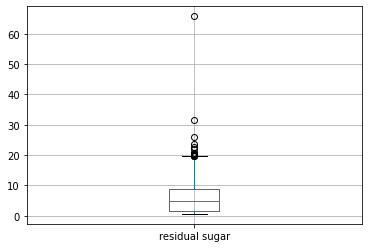

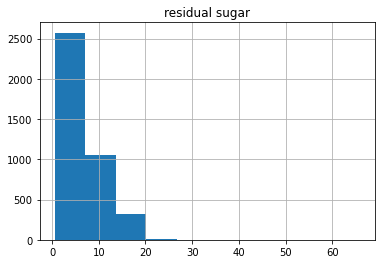

In [9]:

white.boxplot('residual sugar')
white.hist('residual sugar')

array([[<AxesSubplot:title={'center':'chlorides'}>]], dtype=object)

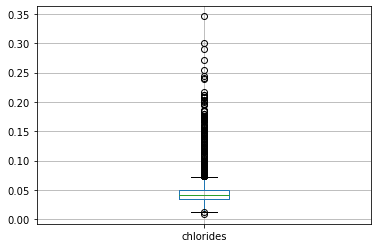

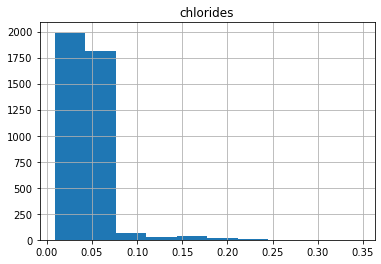

In [10]:
white.boxplot('chlorides')
white.hist('chlorides')

array([[<AxesSubplot:title={'center':'chlorides'}>]], dtype=object)

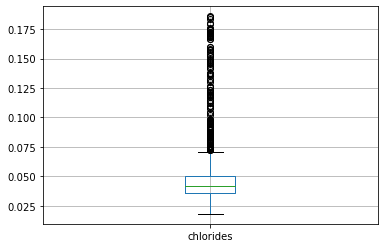

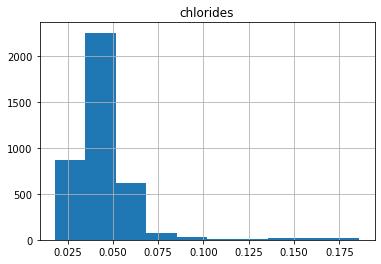

In [11]:
from scipy import stats
import numpy as np

white_outliers = white[(white.chlorides < white.chlorides.quantile(.995)) & (white.chlorides > white.chlorides.quantile(.005))]
white_outliers.boxplot('chlorides')
white_outliers.hist('chlorides')

array([[<AxesSubplot:title={'center':'density'}>]], dtype=object)

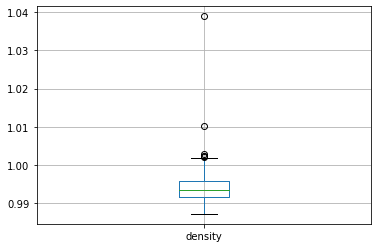

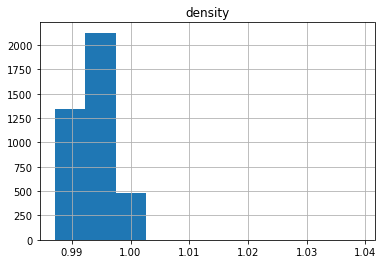

In [12]:
white.boxplot('density')
white.hist('density')

array([[<AxesSubplot:title={'center':'density'}>]], dtype=object)

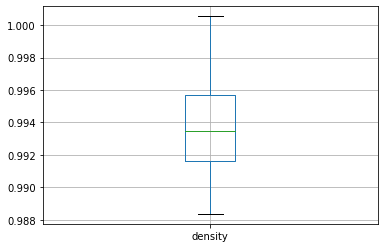

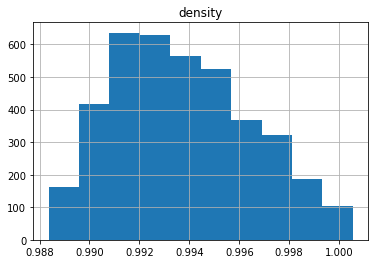

In [13]:
white_outliers = white[(white.density < white.density.quantile(.995)) & (white.density > white.density.quantile(.005))]
white_outliers.boxplot('density')
white_outliers.hist('density')

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

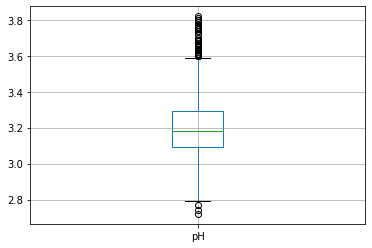

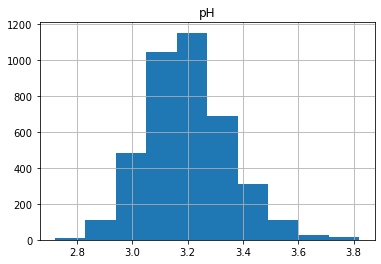

In [14]:
white.boxplot('pH')
white.hist('pH')

array([[<AxesSubplot:title={'center':'sulphates'}>]], dtype=object)

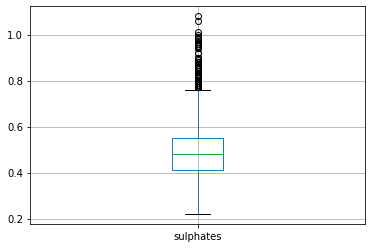

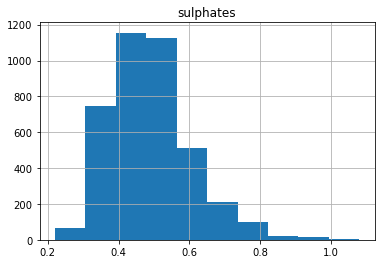

In [15]:
white.boxplot('sulphates')
white.hist('sulphates')

array([[<AxesSubplot:title={'center':'alcohol'}>]], dtype=object)

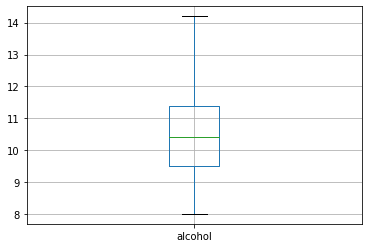

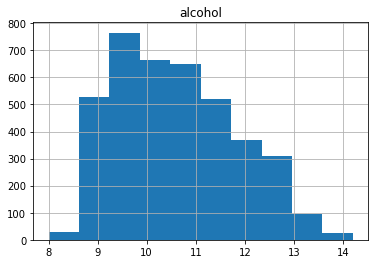

In [16]:
white.boxplot('alcohol')
white.hist('alcohol')

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

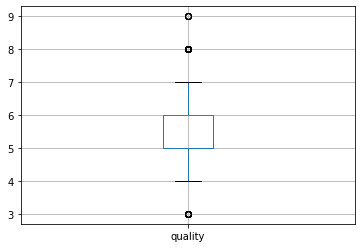

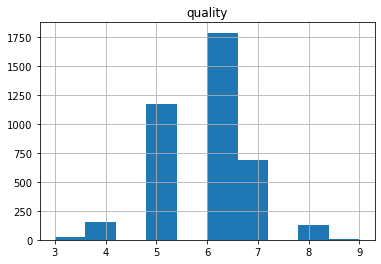

In [17]:
white.boxplot('quality')
white.hist('quality')

In [18]:
white_outliers.shape

(3914, 10)

In [19]:
import seaborn as sns

In [20]:
white_outliers.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
count,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000
mean,6.841019,0.279914,0.334014,5.845069,0.045925,0.993763,3.195915,0.490105,10.583941,5.852325
std,0.860741,0.102647,0.122283,4.672021,0.023183,0.002731,0.151651,0.113133,1.198902,0.890740
min,3.800000,0.080000,0.000000,0.600000,0.012000,0.988360,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035250,0.991640,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,0.993480,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,8.800000,0.050000,0.995680,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,22.600000,0.346000,1.000550,3.820000,1.080000,14.050000,9.000000


In [21]:
white_outliers.nunique()

fixed acidity        68
volatile acidity    122
citric acid          87
residual sugar      300
chlorides           159
density             856
pH                  103
sulphates            78
alcohol             100
quality               7
dtype: int64

In [22]:
corelation = white_outliers.corr()

<AxesSubplot:>

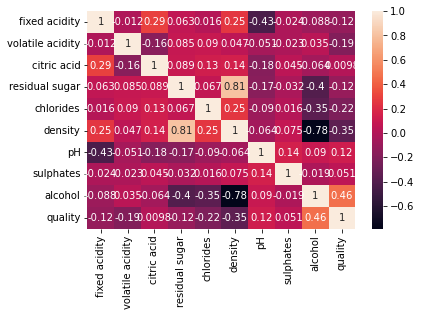

In [23]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [24]:
data = white_outliers.drop(['citric acid', 'sulphates', 'density', 'fixed acidity'], axis = 1) 
# citirc acid and sulphates correlate the least to quality
# alcohol and density as well as pH and fixed acidity are highly correlated
data.head()

,volatile acidity,residual sugar,chlorides,pH,alcohol,quality
1,0.30,1.6,0.049,3.30,9.5,6
2,0.28,6.9,0.050,3.26,10.1,6
3,0.23,8.5,0.058,3.19,9.9,6
6,0.32,7.0,0.045,3.18,9.6,6
9,0.22,1.5,0.044,3.22,11.0,6


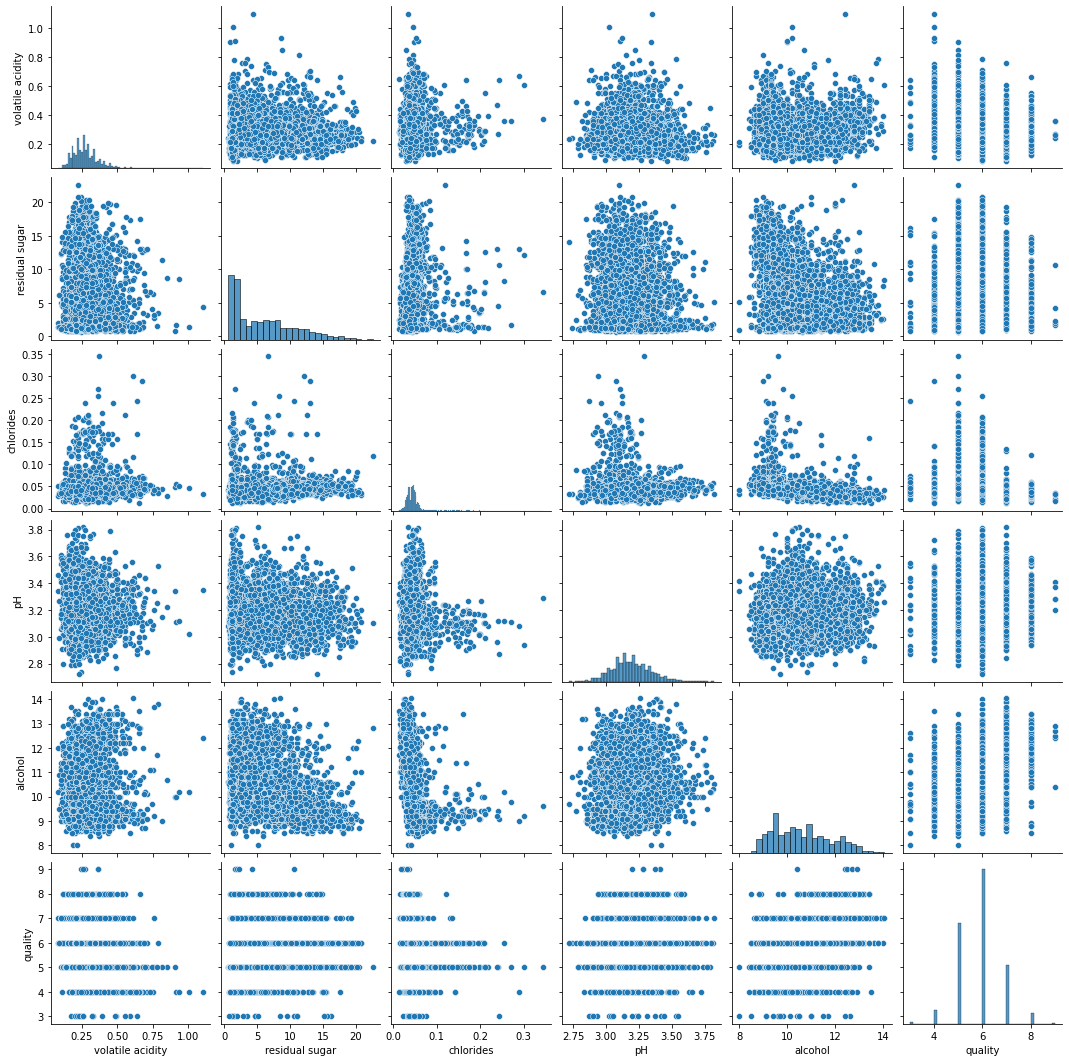

In [25]:
sns.pairplot(data)

# no linear relationship between 2 variables

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

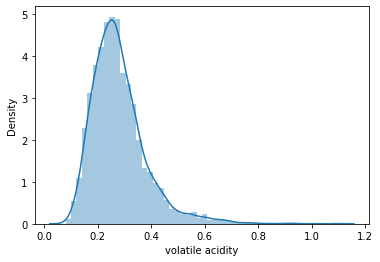

In [26]:
sns.distplot(data['volatile acidity'])

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

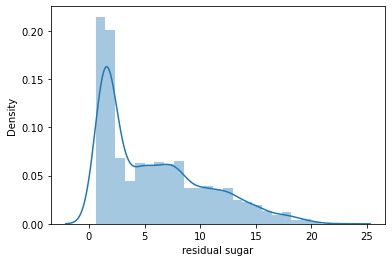

In [27]:
sns.distplot(data['residual sugar'])

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

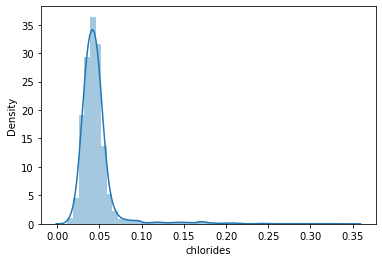

In [28]:
sns.distplot(data['chlorides'])

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

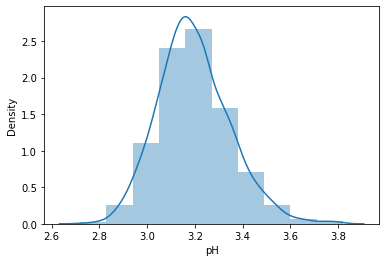

In [29]:
sns.distplot(data['pH'], bins = 10)

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

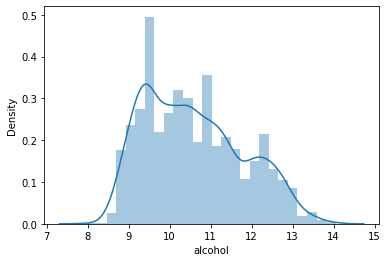

In [30]:
sns.distplot(data['alcohol'])

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

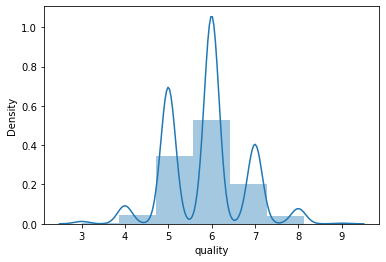

In [31]:
sns.distplot(data['quality'], bins = 7)

In [32]:
data.describe()

,volatile acidity,residual sugar,chlorides,pH,alcohol,quality
count,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000
mean,0.279914,5.845069,0.045925,3.195915,10.583941,5.852325
std,0.102647,4.672021,0.023183,0.151651,1.198902,0.890740
min,0.080000,0.600000,0.012000,2.720000,8.000000,3.000000
25%,0.210000,1.600000,0.035250,3.100000,9.500000,5.000000
50%,0.260000,4.700000,0.042000,3.180000,10.400000,6.000000
75%,0.320000,8.800000,0.050000,3.290000,11.400000,6.000000
max,1.100000,22.600000,0.346000,3.820000,14.050000,9.000000


In [66]:
import matplotlib.pyplot as plt

#train test splits
X = data.drop('quality', axis=1)
y = data.quality.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(3131, 5) (783, 5)


In [34]:
#linear regression model

import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\HomeUseAdmin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     296.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.28e-269
Time:                        12:22:14   Log-Likelihood:                -4471.1
No. Observations:                3914   AIC:                             8954.
Df Residuals:                    3908   BIC:                             8992.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7226      0.303      2.389      0.017       0.130       1.316
volatile acidity    -1.8646      0.120    -15.555      0.000      -2.100      -1.630
residual sugar       0.0224      0.003      7.745      0.000       0.017       0.028
chlorides           -0.7289      0.567     -1.285      0.199      -1.841       0.383
pH                   0.5026      0.081      6.170      0.000       0.343       0.662
alcohol              0.3730      0.012     31.412      0.000       0.350       0.396
==============================================================================
Omnibus:                       90.281   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.672
Skew:                          -0.107   Prob(JB):                     1.77e-41
Kurtosis:                       4.051   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared is poor as only 27% is explained using this model
* P<0.05 is significant - All, but chlorides are significant
* Looking at coefficients, as volatile acidity and chlorides go up, quality goes down. The opposite is true on residual sugar, pH and alcohol.



In [58]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-0.5904013763006176

In [81]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = lm.predict(X_train)

print('Results for linear regression on training data')
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))

y_test_pred = lm.predict(X_test)
print()
print('Results for linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
MAE is   0.5893022839764113
RMSE is  0.7563060839419795
MSE is  0.5719988926076526
R^2     0.2788818746284032

Results for linear regression on test data
MAE is   0.5806359892118623
RMSE is  0.766989018281914
MSE is  0.5882721541650542
R^2     0.2581694295839012


In [59]:
# lasso regression
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

# lasso regression is worse

-0.6833667452930617

In [80]:
y_pred = lm_l.predict(X_train)

print('Results for lasso regression on training data')
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))

y_test_pred = lm_l.predict(X_test)
print()
print('Results for lasso regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for lasso regression on training data
MAE is   0.6831355722914272
RMSE is  0.8906239878477135
MSE is  0.793211087729764
R^2     0.0

Results for lasso regression on test data
MAE is   0.6709267886373361
RMSE is  0.8906675485330705
MSE is  0.7932886820099095
R^2     -0.000363167478657056


In [46]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

# better than lasso regression

-0.5938937256097635

In [79]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)

print('Results for random forest on training data')
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))

y_test_pred = rf.predict(X_test)
print()
print('Results for random forest on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for random forest on training data
MAE is   0.21462791440434367
RMSE is  0.2812020781416768
MSE is  0.0790746087511977
R^2     0.9003107621988545

Results for random forest on test data
MAE is   0.5691826309067689
RMSE is  0.7597178847228859
MSE is  0.5771712643678162
R^2     0.2721680174009625


In [52]:
# tune models GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring ='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [53]:
gs.best_score_

-0.5802604359905911

In [82]:
y_pred = gs.predict(X_train)

print('Results for GridSearch CV on training data')
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))

y_test_pred = gs.predict(X_test)
print()
print('Results for GridSearch CV on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))

Results for GridSearch CV on training data
MAE is   0.2117869690194826
RMSE is  0.27567809316444153
MSE is  0.07599841105078249
R^2     0.9041889199150049

Results for GridSearch CV on test data
MAE is   0.5593231162196679
RMSE is  0.7497734438573198
MSE is  0.5621602171136655
R^2     0.2910974426138466


gs.best_estimator_

In [60]:
# test ensembles

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,tpred_lm)

0.5806359892118623

In [64]:
mean_absolute_error(y_test,tpred_lml)

0.6709267886373361

In [65]:
mean_absolute_error(y_test,tpred_rf)

0.5593231162196679